# Project: Investigate a No-show-appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description  
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.
> **‘PatientId’** indicates the id that identifies each patient.

> **‘AppointmentID’** indicates the id that identifies each appointment.

> **‘Gender’** indicates the patient's gender (Female 'F' or Male 'M').

> **‘ScheduledDay’** tells us on what day the patient set up their appointment.

> **‘AppointmentDay’** when will the appointment take place.

> **‘Age’** tells how old is the patient.

> **‘Neighborhood’** indicates the location of the hospital.

> **‘Scholarship’** indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

> **‘Hipertension’** the patient has hipertension or not.

> **‘Diabetes’** the patient is with diabetes or not.

> **‘Alcoholism’** the patient consumes alcohol or not.

> **‘Handcap’** the patient is handicapped or not and the number of disabillities the have.

> **‘SMS_received’** the patient received a SMS or not.

> **‘No-show’** Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Research Questions
- What is the ratio of show to no show?
- Does having a scholarship have effect on the no-show of patients?
- Does gender determines if a patient show up or not?
- what is the effect of Handicap on patient showing up for appointment?
- In the different age group, do we have more female than male? 
- What is the most important factor that determines if a patient will show up or not

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


>  Data gathering

In [2]:
# load dataset and preview the dataset

df = pd.read_csv('dataset/kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### 
> Assessing data

In [3]:
# check the number of rows and columns

df.shape

(110527, 14)

In [4]:
# get some statictical information about the dataset

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# check for missing values in the dataset

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
# check for duplicates

df.duplicated().sum()

0

**Observation:** <br>
I observed the following: 
- The dataset contains 110527 rows and 14 columns
- There are no missing values in the dataset
- There are no duplicate in the dataset
- Wrong datatype for the columns PatientId and AppointmentID, they should be string
- Wrong datatype for the columns AppointmentDay and scheduledDay, they should be datetime
- The minimum age is -1, we can not have a negative value for age, this should be removed

#### 
> Data Cleaning 

#### rename columns

In [8]:
df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'AppointmentDay':'Appointment_Day', 'ScheduledDay':'Scheduled_Day' }, inplace=True)


In [9]:
# change the column name to lower case, remove whitespace and replace hyphen with underscore

df.rename(columns=lambda x: x.strip().lower().replace("-","_"), inplace=True)
df.head(1)

,patientid,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


#### change the data type

In [10]:
# change datatype of 'scheduled_day' and 'appointment_day' to datetime

s_a_days = ['scheduled_day', 'appointment_day']
for col in s_a_days:
    df[col] = pd.to_datetime(pd.to_datetime(df[col]).dt.date)

df.dtypes

patientid                 float64
appointmentid               int64
gender                     object
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
age                         int64
neighbourhood              object
scholarship                 int64
hypertension                int64
diabetes                    int64
alcoholism                  int64
handicap                    int64
sms_received                int64
no_show                    object
dtype: object

In [11]:
# change the data type of 'patientid', 'appointmentid' to string

s_a_days = ['patientid', 'appointmentid']
for col in s_a_days:
    df[col] = df[col].astype(str)

df.dtypes

patientid                  object
appointmentid              object
gender                     object
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
age                         int64
neighbourhood              object
scholarship                 int64
hypertension                int64
diabetes                    int64
alcoholism                  int64
handicap                    int64
sms_received                int64
no_show                    object
dtype: object

####  drop row with negative age

In [12]:
# drop row with negative age
df = df[df.age != -1]
df.shape

(110526, 14)

#### change yes to 1 and No to 0 in the no_show column

In [13]:
df["no_show"] = np.where(df["no_show"] == "No", 0, 1)

In [14]:
df.no_show.value_counts()

0    88207
1    22319
Name: no_show, dtype: int64

#### change M to 1 and F to 0 in the gender column

In [15]:
df["gender"] = np.where(df["gender"] == "F", 0, 1)

In [16]:
df.gender.value_counts()

0    71839
1    38687
Name: gender, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

#### Research Question 1: 
What is the ratio of show to no show?

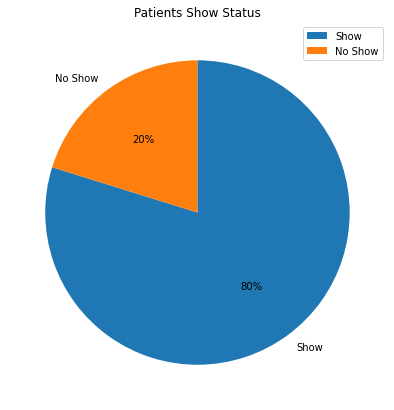

In [17]:
show_no_show = ['Show', 'No Show'] 
data = df['no_show'].value_counts()
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = show_no_show, startangle = 90, counterclock = False, autopct='%1.0f%%')
plt.title('Patients Show Status')
plt.legend();
# show plot
plt.show()

>**Observation:** As seen above only 20% of the appointments are no show appointments.

#### Research Question 2: 
Does having a scholarship have effect on the no-show of patients?

In [18]:
noscholar=df['scholarship'] == 0
scholar=df['scholarship']== 1


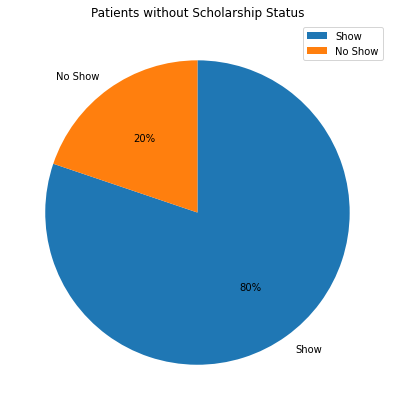

In [19]:
show_no_show = ['Show', 'No Show'] 
data = df['no_show'][noscholar].value_counts()
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = show_no_show, startangle = 90, counterclock = False, autopct='%1.0f%%')
plt.title('Patients without Scholarship Status')
plt.legend();
# show plot
plt.show()

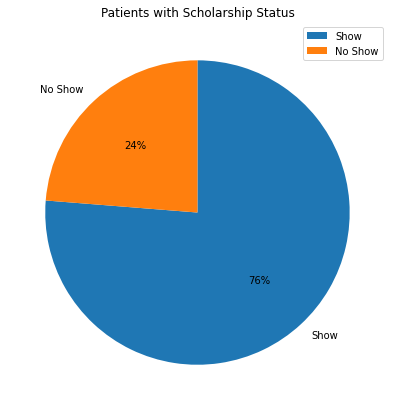

In [20]:
show_no_show = ['Show', 'No Show'] 
data = df['no_show'][scholar].value_counts()
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = show_no_show, startangle = 90, counterclock = False, autopct='%1.0f%%')
plt.title('Patients with Scholarship Status')
plt.legend()
# show plot
plt.show()

>**Observation:** As seen from the pie plots above, having scholarship has effect on 'no show'. The perecentage of patients with scholarship that did not show up is higher than that of patient without scholarship that did not show up

#### Research Question 3: 
Does gender determines if a patient show up or not?

In [21]:
female = df['gender'] == 0
male = df['gender']== 1

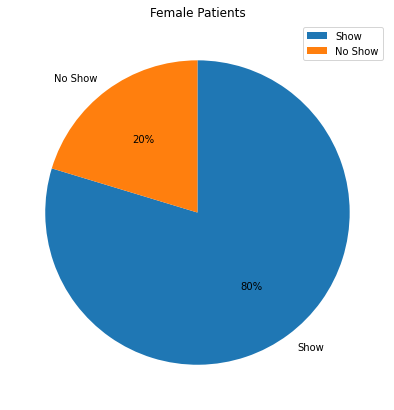

In [22]:
show_no_show = ['Show', 'No Show'] 
data = df['no_show'][female].value_counts()
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = show_no_show, startangle = 90, counterclock = False, autopct='%1.0f%%')
plt.title('Female Patients')
plt.legend();
# show plot
plt.show()

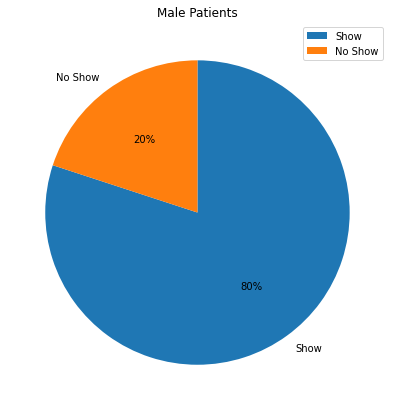

In [23]:
show_no_show = ['Show', 'No Show'] 
data = df['no_show'][male].value_counts()
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = show_no_show, startangle = 90, counterclock = False, autopct='%1.0f%%')
plt.title('Male Patients')
plt.legend()
# show plot
plt.show()

>**Observation:** Gender does not determine if a patient shows up or not. We can see from the plot above that the percentage of no show is the same for both female and male, as well as the original plot with both female and male (20%)

#### Research Question 4:
what is the effect of Handicap on patient showing up for appointment?

In [24]:
# define a function to make pie chart

def pie_plot_yes(df, var):
    yes = df[var] == 1
    no = df[var]==  0
    df['no_show'][yes].value_counts().plot(kind= 'pie',  labels = ['Show Up', 'No Show Up'], figsize=(10, 10), startangle = 90,
        counterclock = False, autopct='%1.0f%%')
    plt.title(var)
    plt.legend()
    plt.show()

def pie_plot_no(df, var):
    yes = df[var] == 1
    no = df[var]==  0
    df['no_show'][no].value_counts().plot(kind= 'pie',  labels = ['Show Up', 'No Show Up'], figsize=(10, 10), startangle = 90,
        counterclock = False, autopct='%1.0f%%')
    plt.legend()
    plt.show()

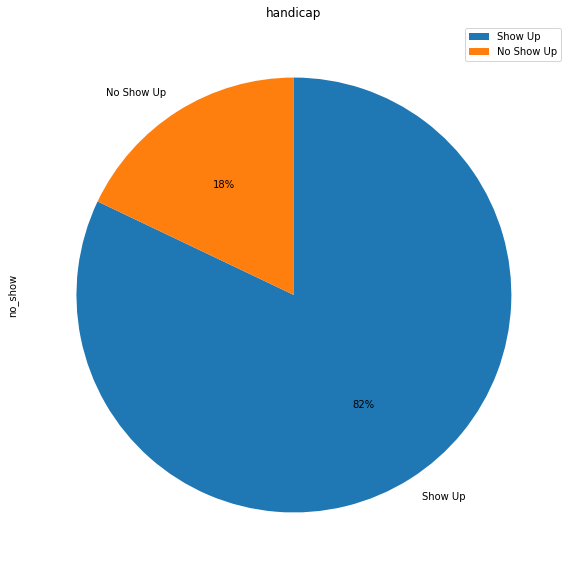

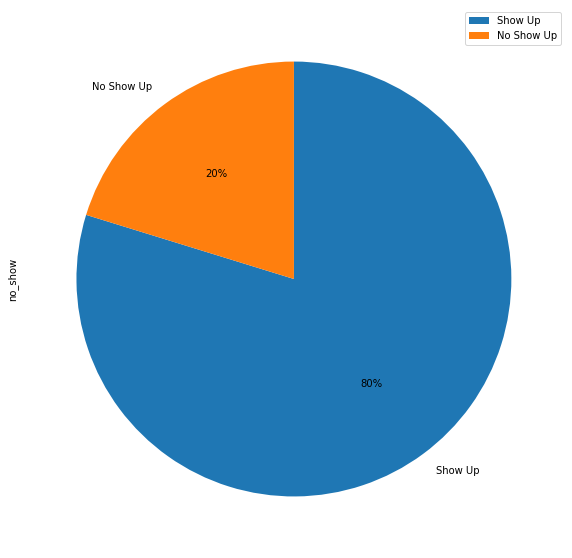

In [25]:
# call the function pie_plot to check the effect of Handicap on No Show

pie_plot_yes(df, "handicap")
pie_plot_no(df, "handicap")

>**Observation:** We can see that patients with disabillities tend to show up for appointments with a percentage slightly better (82%) than the percentage of patient without disabilities that show up for appointments (80%).

#### Research Question 5:
In the different age groups, do we have more female than male in our dataset? 

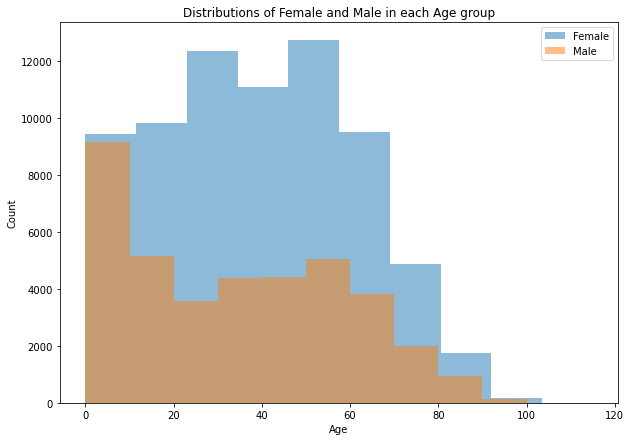

In [26]:
df_f = df[df['gender'] == 0]
df_m = df[df['gender'] == 1]


fig, ax = plt.subplots(figsize =(10,7))
ax.hist(df_f['age'], alpha=0.5, label='Female')
ax.hist(df_m['age'], alpha=0.5, label='Male')
ax.set_title('Distributions of Female and Male in each Age group')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.legend(loc='upper right')
plt.show()

>**Observation:** In the different age group we have more female patients than male patients

#### Research Question 6:
what is the most important factor that determines if a patient will show up or not?

In [27]:
feature_df =df[[ 'no_show','scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'age','gender']]

feature_df.corr()

,no_show,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,age,gender
no_show,1.000000,0.029134,-0.035704,-0.015181,-0.000197,-0.006077,0.126428,-0.060327,-0.004122
scholarship,0.029134,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,-0.092463,-0.114296
hypertension,-0.035704,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,0.504586,-0.055722
diabetes,-0.015181,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,0.292391,-0.032556
alcoholism,-0.000197,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,0.095810,0.106166
handicap,-0.006077,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,0.078032,0.022813
sms_received,0.126428,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,0.012633,-0.046302
age,-0.060327,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,1.000000,-0.106452
gender,-0.004122,-0.114296,-0.055722,-0.032556,0.106166,0.022813,-0.046302,-0.106452,1.000000


>**Observation:** From the above correlation table, we can see that only sms_received have a significant correlation with no_show, and it is a weak positive relationship. So we can safely say that sms_received is the most important factor that determines if a patient will show up or not

<a id='conclusions'></a>
## Conclusions

#### Research Question 1 (What is the ratio of show to no show?)
>**Observation:** Only about 20% of the appointments are no show appointments.
#### Research Question 2  (Does having a scholarship have effect on the no-show of patients?)
>**Observation:** Having scholarship has effect on 'no show'. The perecentage of patients with scholarship that did not show up is higher than that of patient without scholarship that did not show up
#### Research Question 3  (Does gender determines if a patient show up or not?)
>**Observation:** Gender does not determine if a patient shows up or not. The percentage of no show is the same for both female and male, as well as that of the original plot with both female and male (20%)
#### Research Question 4 (what is the effect of Handicap on patient showing up for appointment?)
>**Observation:** patients with disabillities tend to show up for appointments with a percentage slightly better (82%) than the percentage of patient without disabilities that show up for appointments (80%)
#### Research Question 5  (In the different age groups, do we have more female than male in our dataset?  )
>**Observation:** we have more female patients than male patients
#### Research Question 6  ( What is the most important factor that determines if a patient will show up or not)
>**Observation:** Only sms_received have a significant correlation with no_show, and it is a weak positive relationship. So we can safely say that sms_received is the most important factor that determines if a patient will show up or not


## Limitations
- There is little information about the neighborhood and if the locaion of the hospital is in a good place or in a remote area.
- To have better analysis it would be better if the data was updated to a more recent one.
- The data covered a short time
- No information about the type of disability the patient have, because this can have singficant effect on No-Show.